#**ML Assignment 1: Tabular Data**
**Group TN01 - Team SEML31**  
**Dataset:** [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/)

> The authors has trained the models and saved the accuracy/f1-score results. If you want to train the model, change the following code cell to **True** to retrain the ML models (might take 15-20 minutes to fully train all models).

In [1]:
TRAIN_MODEL = False

# 1. Download and Import Data

In [2]:
!mkdir /content/datasets
!curl -L -o /content/datasets/tabular.zip\
  https://www.kaggle.com/api/v1/datasets/download/jsphyg/weather-dataset-rattle-package
!unzip -o /content/datasets/tabular.zip -d ./datasets/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3926k  100 3926k    0     0  1721k      0  0:00:02  0:00:02 --:--:-- 2168k
Archive:  /content/datasets/tabular.zip
  inflating: ./datasets/weatherAUS.csv  


In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter(action ='ignore')
plt.style.use('seaborn-v0_8-deep')

#data saved in '/content/datasets/'
ds = pd.read_csv('/content/datasets/weatherAUS.csv')
#backup
ds_backup = ds.copy()

# 2. Exploratory data analysis

In [4]:
#dimensions of dataset
ds.shape

(145460, 23)

In [5]:
#summary of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#preview the dataset
ds.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
#sort out categorical and numerical cols
num_cols = ds.select_dtypes(include=["number"]).columns
cat_cols = ds.select_dtypes(exclude=["number"]).columns

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
#describe the dataset
#numerical cols
ds[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#categorical cols
ds[cat_cols].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


<Axes: title={'center': 'Number of sample per year'}, xlabel='Date', ylabel='count'>

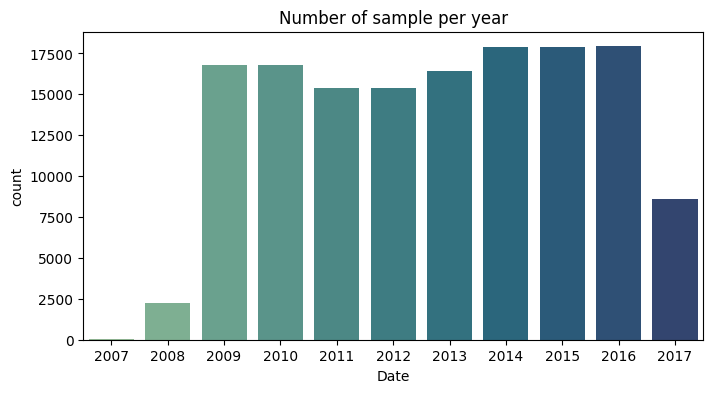

In [10]:
#number of sample per year
year = pd.to_datetime(ds.Date).dt.year
plt.figure(figsize=(8,4))
plt.title("Number of sample per year")
sns.countplot(x=year,palette="crest")

<Axes: title={'center': 'Number of sample per location'}, xlabel='Location', ylabel='count'>

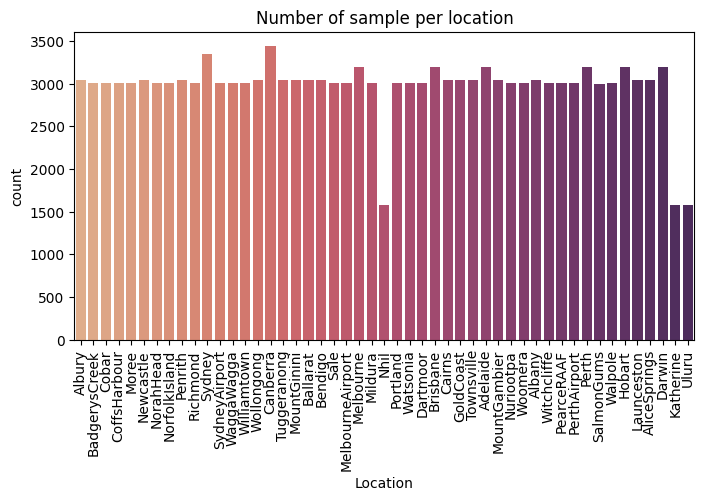

In [11]:
#number of sample per location
plt.figure(figsize=(8,4))
plt.title("Number of sample per location")
plt.xticks(rotation=90)
sns.countplot(x=ds.Location,palette="flare")

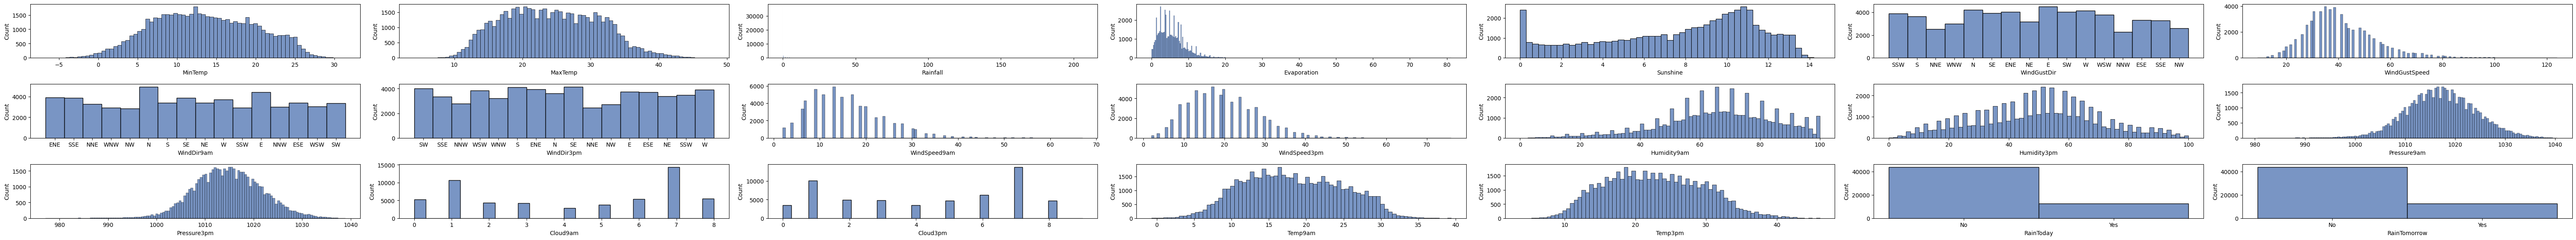

In [12]:
#distibutions of the data
#use a copy of dataset for plotting
ds1 = ds.copy()
#we temporary drop Data and Location for now
ds1.drop(['Date','Location'],axis=1,inplace=True)
ds1.dropna(inplace=True)

num_of_cols = ds1.shape[1]
rows = 3
fig, axes = plt.subplots(nrows=rows, ncols=math.ceil(num_of_cols/rows), figsize=(3*num_of_cols, 2*rows))
for ax, col in zip(axes.flatten(), ds1.columns):
    sns.histplot(ds1[col], kde=False, ax=ax)

plt.tight_layout(pad=1.2)
plt.show()
#click on the plot to see details

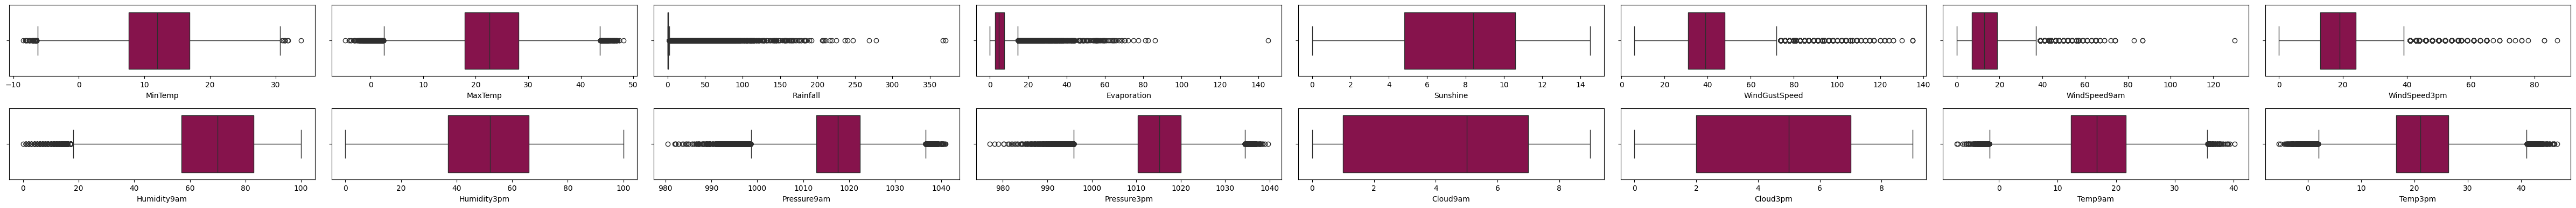

In [13]:
#barplot for highlighting outliers
num_of_cols = num_cols.shape[0]
rows = 2
fig, axes = plt.subplots(nrows=rows, ncols=math.ceil(num_of_cols/rows), figsize=(3*num_of_cols, 2*rows))
for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(x=ds[col], ax=ax, color='#99004c')

plt.tight_layout(pad=1.2)
plt.show()

<Figure size 1000x500 with 0 Axes>

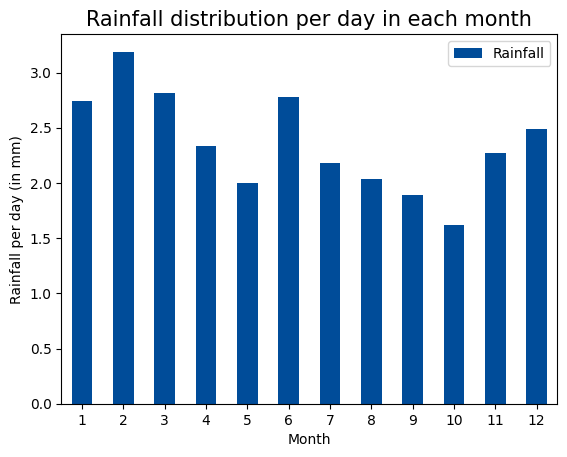

In [14]:
#rainfall distribution in each month
ds['Date'] = pd.to_datetime(ds['Date'], errors='coerce')
rf =[ds['Date'].dt.year, ds['Date'].dt.month, ds['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rf_ds = pd.concat(rf, axis=1, keys=headers)

plt.figure(figsize=(10,5))
a = rf_ds.groupby('Month').agg({'Rainfall':'mean'})
a.plot(kind='bar', color='#004c99')
plt.title('Rainfall distribution per day in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall per day (in mm)', fontsize=10)
plt.xticks(rotation=0)
plt.show()

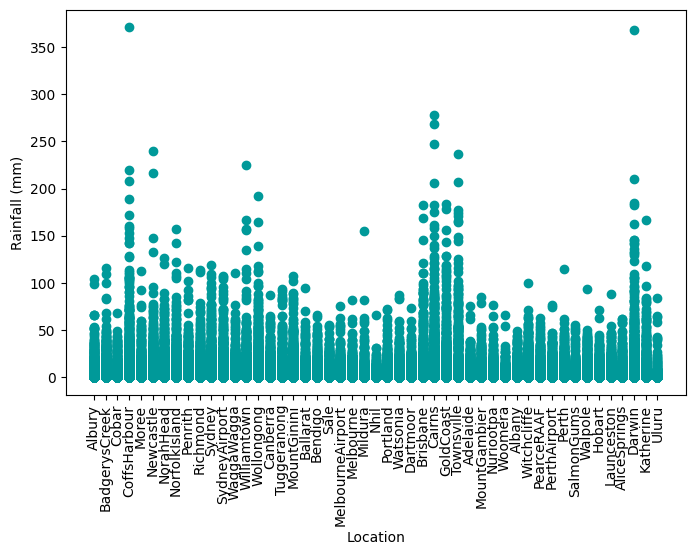

In [15]:
#rainfall distribution in each location
plt.figure(figsize=(8,5))
plt.scatter(ds['Location'],ds['Rainfall'],color='#009999')
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall (mm)")
plt.show()

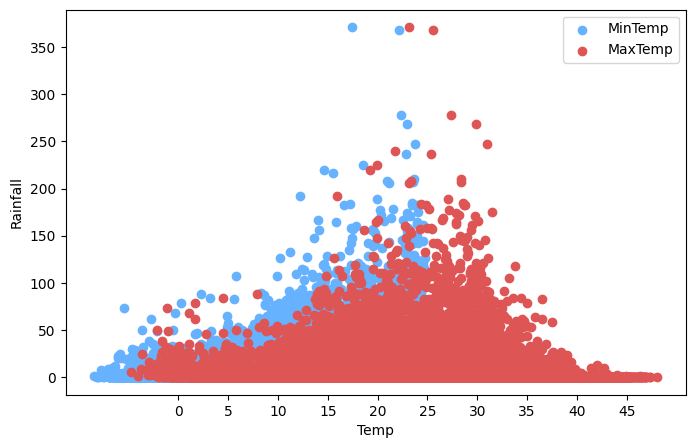

In [16]:
#comparing Rainfall based on MinTemp and MaxTemp
plt.figure(figsize=(8,5))
plt.scatter(ds['MinTemp'],ds['Rainfall'],color='#66b2ff')
plt.scatter(ds['MaxTemp'],ds['Rainfall'], color="#DE5555")
plt.xlabel("Temp")
plt.xticks(range(0,50,5))
plt.ylabel("Rainfall")
plt.legend(labels=['MinTemp','MaxTemp'])
plt.show()

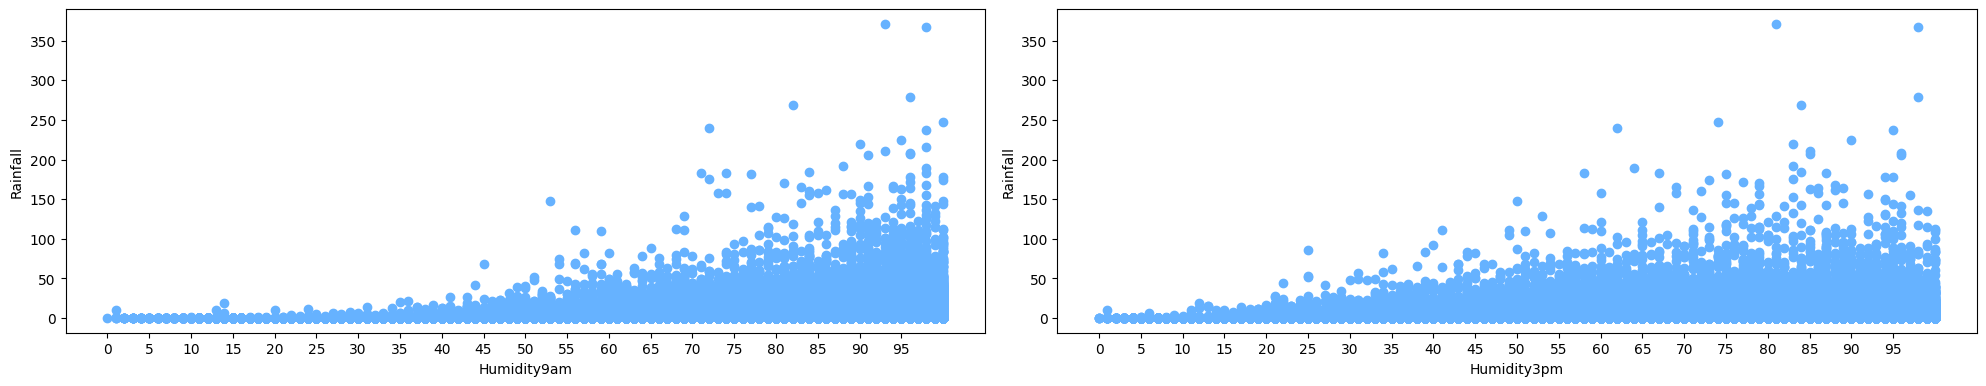

In [17]:
#comparing Rainfall based on Humidity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
cols = ['Humidity9am','Humidity3pm']
for i, col in enumerate(cols):
    axes[i].scatter(ds[col],ds['Rainfall'],color='#66b2ff')
    axes[i].set_xlabel(col)
    axes[i].set_xticks(range(0,100,5))
    axes[i].set_ylabel("Rainfall")
plt.tight_layout(pad=1.2)
plt.show()

Text(0.5, 1.0, 'Rain Today vs Rain Tomorrow')

<Figure size 600x400 with 0 Axes>

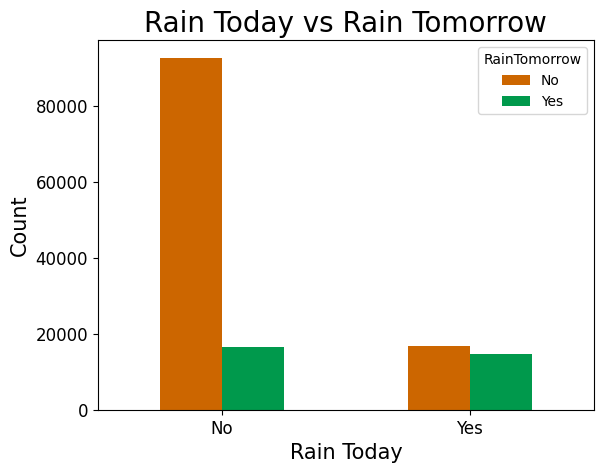

In [18]:
#comparison between RainToday and RainTomorrow
cmp_plot = pd.crosstab(ds['RainToday'], ds['RainTomorrow'])
plt.figure(figsize=(6,4))
cmp_plot.plot(kind='bar',stacked=False,color=['#CC6600','#00994C'])
plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today vs Rain Tomorrow', fontsize=20)

Text(0.5, 1.0, 'Linear correlation of numeric features')

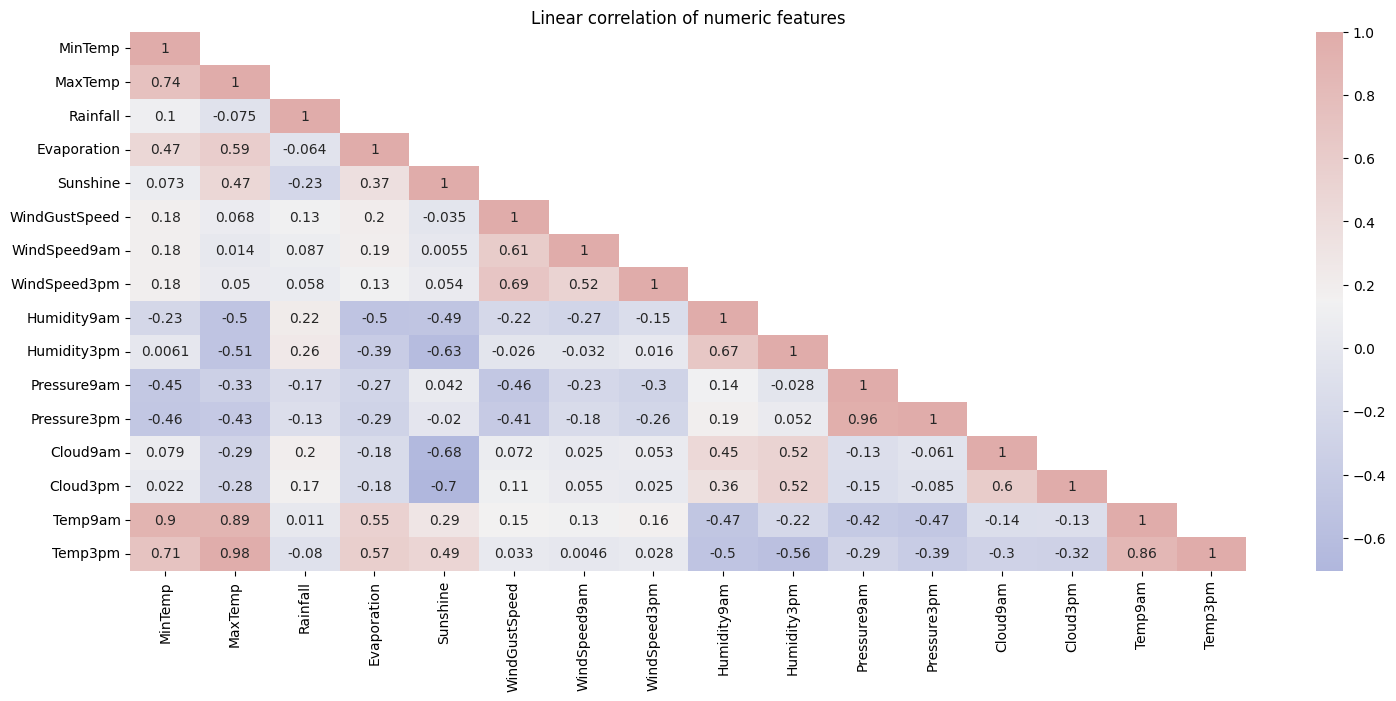

In [19]:
#linear correlation of numeric features
corrmat = ds[num_cols].corr()
cmap = sns.diverging_palette(260,15,s=50, l=75, n=6, as_cmap=True)
plt.figure(figsize=(18,7))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=False,mask=~np.tril(np.ones((corrmat.shape[0], corrmat.shape[0]), dtype=bool)))
plt.title("Linear correlation of numeric features")

# 3. Preprocessing

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [21]:
#pipeline function for preprocessing
def RainDataPipeline(
        ds_dir='/content/datasets/weatherAUS.csv',
        up_sampling=False, #upsampling or downsampling for target balancing
        drop_outlier=False, #drop outlier or not
        fill_na='median', #'median' or 'mean' for numerical imputation
        cat_encode='ordinal', #'ordinal' or 'onehot' encoding for categorical cols
        scale='norm', #'norm' or 'minmax' scaler
        feature_range=(0,1), #for minmax scaler
        pca_variance = 0.95,  #pca variance or None
        test_size = 0.2, #test size for train_test_split
        random_state = 42 #random state for train_test_split
):
    if fill_na not in ['median','mean'] or cat_encode not in ['ordinal','onehot'] or scale not in ['norm','minmax']:
        raise ValueError("Invalid input")

    ds = pd.read_csv(ds_dir)
    #parsing Date values into datetime
    ds['Date'] = pd.to_datetime(ds_backup['Date'])
    ds['Year'] = ds.Date.dt.year
    ds['Month'] = ds.Date.dt.month
    ds['Day'] = ds.Date.dt.day
    ds.drop('Date',axis=1,inplace=True)

    if up_sampling:
        ds_upsampled = ds.copy()
        rt_no = ds_upsampled[ds_upsampled.RainTomorrow.astype(str) == 'No']
        rt_yes = ds_upsampled[ds_upsampled.RainTomorrow.astype(str) == 'Yes']
        ds_upsampled = resample(rt_yes, replace=True, n_samples=len(rt_no), random_state=42)
        ds_balanced = pd.concat([rt_no, ds_upsampled])
    else: #downsampling
        rt_no = (ds.RainTomorrow.astype(str) == 'No') &  (ds.RainToday.astype(str) == 'No')
        na_count = ds.isna().sum(axis=1)
        idx_drop = na_count[rt_no].nlargest(len(rt_no)//2).index
        ds_balanced = ds.drop(index=idx_drop)

    ds_balanced = ds_balanced.dropna(subset=["RainTomorrow"])

    x = ds_balanced.drop("RainTomorrow", axis=1)
    y = ds_balanced["RainTomorrow"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    y_train = y_train.astype(str).map({"Yes": 1, "No": 0}).astype('int32')
    y_test = y_test.astype(str).map({"Yes": 1, "No": 0}).astype('int32')

    num_cols = x_train.select_dtypes(include=["number"]).columns
    cat_cols = x_test.select_dtypes(exclude=["number"]).columns

    if drop_outlier:
        for col in ['MinTemp', 'MaxTemp','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm','Rainfall','Sunshine','Evaporation']:
            q1 = x_train[col].quantile(0.25)
            q3 = x_train[col].quantile(0.75)
            lower, upper = q1 - 1.5*(q3-q1), q3 + 1.5*(q3-q1)
            mask = x_train[col].isna() | ((x_train[col] >= lower) & (x_train[col] <= upper))
            x_train = x_train[mask]
            y_train = y_train[mask]
            mask_test = x_test[col].isna() | ((x_test[col] >= lower) & (x_test[col] <= upper))
            x_test = x_test[mask_test]
            y_test = y_test[mask_test]

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=fill_na)),
        ("scaler", StandardScaler() if scale == 'norm' else MinMaxScaler(feature_range=feature_range)),
        ("pca", PCA(n_components=pca_variance) if pca_variance is not None else "passthrough")
    ])
    ordinal_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ])
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder",OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) if cat_encode == 'ordinal' else OneHotEncoder(handle_unknown="ignore"))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols.drop('Location')),
            ("loc",ordinal_transformer,['Location'])
        ]
    )
    x_train = preprocessor.fit_transform(x_train)
    x_test = preprocessor.transform(x_test)

    return x_train, x_test, y_train, y_test


# 4. Modeling

The following preprocess configuration is selected:

1.   `fill_na`: median, mean
2.   `cat_encode`: ordinal, onehot
3.   `pca_variance`: 0.9, None

=> A total of $2\cdot 2\cdot 2 = 8$ preprocessing combinations



In [22]:
# 2^3 = 8 preprocess configs
preprocess_configs = [
    {
        "fill_na": fill,
        "cat_encode": encode,
        "pca_variance": pca
    }
    for fill in ["median", "mean"]
    for encode in ["ordinal", "onehot"]
    for pca in [0.9, None]
]
print(preprocess_configs)

processed_data = []
for preprocess_config in preprocess_configs:
    X_train, X_test, y_train, y_test = RainDataPipeline(**preprocess_config)
    processed_data.append((X_train, X_test, y_train, y_test))
print(len(processed_data))

[{'fill_na': 'median', 'cat_encode': 'ordinal', 'pca_variance': 0.9}, {'fill_na': 'median', 'cat_encode': 'ordinal', 'pca_variance': None}, {'fill_na': 'median', 'cat_encode': 'onehot', 'pca_variance': 0.9}, {'fill_na': 'median', 'cat_encode': 'onehot', 'pca_variance': None}, {'fill_na': 'mean', 'cat_encode': 'ordinal', 'pca_variance': 0.9}, {'fill_na': 'mean', 'cat_encode': 'ordinal', 'pca_variance': None}, {'fill_na': 'mean', 'cat_encode': 'onehot', 'pca_variance': 0.9}, {'fill_na': 'mean', 'cat_encode': 'onehot', 'pca_variance': None}]
8


## Traditional ML model (`scikit-learn`)

Using traditional ML models with configuration below:

1. K-Nearest Neighbors, `n_neighbors`: 5, 11
2. Logistic Regression, `penalty`: l2, None
3. Random Forests, `n_estimators`: 50, 100
4. XGBoost, `learning_rate`: 0.1, 0.3


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 4 type of ML model, each with 2 configs
knn_config = [{"n_neighbors": n} for n in [5, 11]]
logistic_config = [{"penalty": p, "random_state": 42} for p in [None, "l2"]]
forest_config = [{"n_estimators": n, "random_state": 42} for n in [50, 100]]
boost_config = [{"learning_rate": lr, "random_state": 42} for lr in [0.1, 0.3]]


models = {
    'K-Nearest Neighbors': (KNeighborsClassifier, knn_config),
    'Logistic Regression': (LogisticRegression, logistic_config),
    'Random Forest': (RandomForestClassifier, forest_config),
    'XGBoost': (XGBClassifier, boost_config),
}

Train multiple model configurations (this cell takes 10-15 minutes to execute)

In [24]:
import time

model_result = pd.DataFrame(columns=[
    "classifier",
    "model_config",
    "fill_na",
    "encode",
    "pca",
    "accuracy",
    "precision",
    "recall",
    "f1"
])

# Train and evaluate
if TRAIN_MODEL:
    for name, (classifier, model_configs) in models.items():
        print(f"Training {name}...")
        start_time = time.time()

        for model_config in model_configs:

            model = classifier(**model_config)

            for data_config, data_splited in zip(preprocess_configs, processed_data):
                X_train, X_test, y_train, y_test = data_splited
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                model_result.loc[len(model_result)] = [
                    name,
                    list(model_config.values())[0],
                    *data_config.values(),
                    accuracy, precision, recall, f1
                ]

                print(".", end='')
        end_time = time.time()
        elapsed_time = int(end_time - start_time)
        print(f"\nElapsed time: {elapsed_time // 60} minutes {elapsed_time % 60} seconds\n")
else:
    print("Training skipped.")

Training skipped.


## Deep learning MLP model (`pytorch`)

In [25]:
BATCH_SIZE = 64
NUM_EPOCH = 10

Define the MLP model architecture:

In [26]:
import torch
import torch.nn as nn
import numpy as np


class MLP(nn.Module):
    def __init__(self, in_dim, num_hidden=2):
        super().__init__()
        if num_hidden not in [2, 3]:
            raise ValueError("num_hidden must be 2 or 3.")

        if num_hidden == 2:
            self.sequence = nn.Sequential(
                nn.Linear(in_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 1),
            )
        elif num_hidden == 3:
            self.sequence = nn.Sequential(
                nn.Linear(in_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1),
            )


    def forward(self, x):
        x = self.sequence(x)
        return x


Implement the Dataset for the model:

In [27]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        X = torch.from_numpy(self.features[idx]).float() # Convert to float32
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return X, y

Utilities function (train and evaluate)

In [28]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        pred = model(X).squeeze()
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # if batch % 100 == 0:
        #     loss = loss.item()
        #     current = batch * BATCH_SIZE + len(X)
        #     print(f"loss: {loss:>10f}, {current:>7}/{size}")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X).squeeze()
            test_loss += loss_fn(pred, y).item()
            pred_prob = torch.sigmoid(pred)
            pred_class = (pred_prob > 0.5).float()
            correct += (pred_class == y).float().sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Train multiple MLP configurations (this cell takes about 5-7 minutes)

In [29]:
from torch.optim import Adam

mlp_hidden_choice = [2, 3]


if TRAIN_MODEL:
    print("Training MLP...")
    start_time = time.time()

    for num_hidden in mlp_hidden_choice:
        for data_config, data_splited in zip(preprocess_configs, processed_data):
            X_train, X_test, y_train, y_test = data_splited

            if not isinstance(X_train, np.ndarray):
                X_train = X_train.toarray()
                X_test = X_test.toarray()

            y_train = y_train.to_numpy()
            y_test = y_test.to_numpy()

            train_set = MyDataset(X_train, y_train)
            test_set = MyDataset(X_test, y_test)
            train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
            test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

            model = MLP(in_dim=X_train.shape[-1], num_hidden=num_hidden)
            loss_fn = nn.BCEWithLogitsLoss()
            optimizer = Adam(model.parameters())

            for epoch in range(NUM_EPOCH):
                # print(f"Epoch {epoch+1}\n-------------------------------")
                train_loop(train_loader, model, loss_fn, optimizer)
                # test_loop(test_loader, model, loss_fn)

            logits = model(torch.tensor(X_test).float())
            pred_prob = torch.sigmoid(logits)
            y_pred = pred_prob > 0.5

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            model_result.loc[len(model_result)] = [
                "MLP",
                num_hidden,
                *data_config.values(),
                accuracy, precision, recall, f1
            ]

            print(".", end="")

    end_time = time.time()
    elapsed_time = int(end_time - start_time)
    print(f"\nElapsed time: {elapsed_time // 60} minutes {elapsed_time % 60} seconds\n")
else:
    print("Training skipped.")

Training skipped.


In [30]:
# # Uncomment to save the result as a csv file
# model_result.to_csv("model_result.csv", index=False)

In [31]:
# Download the saved result if not retrained
import gdown

if not TRAIN_MODEL:
    csv_url = "https://drive.google.com/file/d/10cwE69o4DYDNaMdDExRJwF2sRc3Y5qVu/view?usp=sharing"
    csv_filename = "model_result.csv"
    gdown.download(csv_url, output=csv_filename, fuzzy=True)
    model_result = pd.read_csv(csv_filename)

Downloading...
From: https://drive.google.com/uc?id=10cwE69o4DYDNaMdDExRJwF2sRc3Y5qVu
To: /content/model_result.csv
100%|██████████| 8.64k/8.64k [00:00<00:00, 16.1MB/s]


In [32]:
model_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   classifier    80 non-null     object 
 1   model_config  72 non-null     object 
 2   fill_na       80 non-null     object 
 3   encode        80 non-null     object 
 4   pca           40 non-null     float64
 5   accuracy      80 non-null     float64
 6   precision     80 non-null     float64
 7   recall        80 non-null     float64
 8   f1            80 non-null     float64
dtypes: float64(5), object(4)
memory usage: 5.8+ KB


In [33]:
model_result = model_result.fillna("None")

In [34]:
def highlight_row(row, idx):
    if row.name == idx:
        return ["background-color: yellow"] * len(row)
    else:
        return [""] * len(row)

Selecting configuration with the highest f1-score for each type of model

In [35]:
from IPython.display import display

model_names = [*models.keys(), "MLP"]
model_max_f1 = []
for name in model_names:
    df_result = model_result[model_result["classifier"] == name]
    max_f1_row_idx = df_result["f1"].idxmax()
    model_max_f1.append(max_f1_row_idx)
    styled_result = df_result.style.apply(highlight_row, axis=1, idx=max_f1_row_idx)

    print(f"{name} result:")
    display(styled_result)
    print(f"=> The best configuration for {name} is:")
    print("* Model config")
    if name == "MLP":
        print(f"  - num_hidden: {df_result.loc[max_f1_row_idx, 'model_config']}")
    else:
        print(f"  - {list(models[name][1][0].keys())[0]}: {df_result.loc[max_f1_row_idx, 'model_config']}")

    print("* Preprocess config")
    for preprocess_type in ["fill_na", "encode", "pca"]:
        print(f"  - {preprocess_type}: {df_result.loc[max_f1_row_idx, preprocess_type]}")

    print()

K-Nearest Neighbors result:


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
0,K-Nearest Neighbors,5,median,ordinal,0.900000,0.749082,0.735564,0.712860,0.724034
1,K-Nearest Neighbors,5,median,ordinal,None,0.754121,0.742991,0.714731,0.728587
2,K-Nearest Neighbors,5,median,onehot,0.900000,0.794429,0.790057,0.755573,0.772430
3,K-Nearest Neighbors,5,median,onehot,None,0.799827,0.799440,0.756196,0.777217
4,K-Nearest Neighbors,5,mean,ordinal,0.900000,0.749370,0.737644,0.709587,0.723343
5,K-Nearest Neighbors,5,mean,ordinal,None,0.755057,0.744163,0.715511,0.729556
6,K-Nearest Neighbors,5,mean,onehot,0.900000,0.792773,0.789078,0.752299,0.770250
7,K-Nearest Neighbors,5,mean,onehot,None,0.801699,0.800591,0.759782,0.779653
8,K-Nearest Neighbors,11,median,ordinal,0.900000,0.760239,0.745620,0.729696,0.737572
9,K-Nearest Neighbors,11,median,ordinal,None,0.763622,0.750520,0.731099,0.740682


=> The best configuration for K-Nearest Neighbors is:
* Model config
  - n_neighbors: 11
* Preprocess config
  - fill_na: mean
  - encode: onehot
  - pca: None

Logistic Regression result:


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
16,Logistic Regression,None,median,ordinal,0.900000,0.754841,0.742700,0.717693,0.729983
17,Logistic Regression,None,median,ordinal,None,0.772619,0.765839,0.731099,0.748066
18,Logistic Regression,None,median,onehot,0.900000,0.760095,0.746955,0.726578,0.736626
19,Logistic Regression,None,median,onehot,None,0.777442,0.769243,0.739984,0.754330
20,Logistic Regression,None,mean,ordinal,0.900000,0.750738,0.740234,0.708963,0.724261
21,Logistic Regression,None,mean,ordinal,None,0.772475,0.769193,0.724708,0.746288
22,Logistic Regression,None,mean,onehot,0.900000,0.757792,0.746604,0.719719,0.732915
23,Logistic Regression,None,mean,onehot,None,0.775858,0.770707,0.732502,0.751119
24,Logistic Regression,l2,median,ordinal,0.900000,0.754769,0.742659,0.717537,0.729882
25,Logistic Regression,l2,median,ordinal,None,0.772259,0.765648,0.730320,0.747567


=> The best configuration for Logistic Regression is:
* Model config
  - penalty: None
* Preprocess config
  - fill_na: median
  - encode: onehot
  - pca: None

Random Forest result:


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
32,Random Forest,50,median,ordinal,0.900000,0.802418,0.796350,0.768667,0.782264
33,Random Forest,50,median,ordinal,None,0.829554,0.839570,0.779891,0.808631
34,Random Forest,50,median,onehot,0.900000,0.801411,0.796850,0.764926,0.780562
35,Random Forest,50,median,onehot,None,0.827179,0.832395,0.783476,0.807195
36,Random Forest,50,mean,ordinal,0.900000,0.803642,0.798253,0.769135,0.783423
37,Random Forest,50,mean,ordinal,None,0.831930,0.842742,0.781917,0.811191
38,Random Forest,50,mean,onehot,0.900000,0.799683,0.795669,0.761808,0.778371
39,Random Forest,50,mean,onehot,None,0.831642,0.842521,0.781450,0.810837
40,Random Forest,100,median,ordinal,0.900000,0.802634,0.794547,0.772253,0.783241
41,Random Forest,100,median,ordinal,None,0.829482,0.834491,0.786750,0.809917


=> The best configuration for Random Forest is:
* Model config
  - n_estimators: 100
* Preprocess config
  - fill_na: mean
  - encode: ordinal
  - pca: None

XGBoost result:


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
48,XGBoost,0.1,median,ordinal,0.900000,0.818974,0.818315,0.781450,0.799458
49,XGBoost,0.1,median,ordinal,None,0.840999,0.851672,0.793920,0.821783
50,XGBoost,0.1,median,onehot,0.900000,0.819261,0.816677,0.784723,0.800382
51,XGBoost,0.1,median,onehot,None,0.839919,0.851417,0.791426,0.820326
52,XGBoost,0.1,mean,ordinal,0.900000,0.819333,0.818256,0.782541,0.800000
53,XGBoost,0.1,mean,ordinal,None,0.846757,0.863097,0.794076,0.827149
54,XGBoost,0.1,mean,onehot,0.900000,0.819405,0.817045,0.784567,0.800477
55,XGBoost,0.1,mean,onehot,None,0.845966,0.864574,0.790179,0.825705
56,XGBoost,0.3,median,ordinal,0.900000,0.829986,0.829138,0.795791,0.812122
57,XGBoost,0.3,median,ordinal,None,0.846469,0.851907,0.807950,0.829346


=> The best configuration for XGBoost is:
* Model config
  - learning_rate: 0.3
* Preprocess config
  - fill_na: mean
  - encode: ordinal
  - pca: None

MLP result:


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
64,MLP,2,median,ordinal,0.900000,0.793565,0.799628,0.737802,0.767472
65,MLP,2,median,ordinal,None,0.806881,0.811104,0.758379,0.783856
66,MLP,2,median,onehot,0.900000,0.798388,0.770105,0.803118,0.786265
67,MLP,2,median,onehot,None,0.815950,0.781770,0.834295,0.807179
68,MLP,2,mean,ordinal,0.900000,0.793205,0.790996,0.750429,0.770178
69,MLP,2,mean,ordinal,None,0.816238,0.815626,0.777864,0.796298
70,MLP,2,mean,onehot,0.900000,0.802994,0.811168,0.747311,0.777931
71,MLP,2,mean,onehot,None,0.817102,0.824347,0.767420,0.794866
72,MLP,3,median,ordinal,0.900000,0.791622,0.784238,0.756976,0.770366
73,MLP,3,median,ordinal,None,0.809256,0.827107,0.742011,0.782251


=> The best configuration for MLP is:
* Model config
  - num_hidden: 2
* Preprocess config
  - fill_na: median
  - encode: onehot
  - pca: None



Comparing the highest f1 score configurations in each type of model against each other:

In [36]:
max_f1_models = model_result.loc[model_max_f1]
best_model_idx = max_f1_models["f1"].idxmax()
max_f1_styled = max_f1_models.style.apply(highlight_row, axis=1, idx=best_model_idx)

print(f"The model with the highest f1-score is {model_result.loc[best_model_idx, 'classifier']}.")
max_f1_styled

The model with the highest f1-score is XGBoost.


,classifier,model_config,fill_na,encode,pca,accuracy,precision,recall,f1
15,K-Nearest Neighbors,11,mean,onehot,None,0.814223,0.813645,0.775214,0.793965
19,Logistic Regression,None,median,onehot,None,0.777442,0.769243,0.739984,0.754330
45,Random Forest,100,mean,ordinal,None,0.836536,0.845103,0.790959,0.817135
61,XGBoost,0.3,mean,ordinal,None,0.850932,0.860438,0.808262,0.833534
67,MLP,2,median,onehot,None,0.815950,0.781770,0.834295,0.807179
